# Output Variables

Binary Classifier -> memory_change

Regression -> PALFAMS28Percentile

In [1]:
import pandas as pd
from copy import deepcopy
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split 
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import r2_score
from rfpimp import permutation_importances
import statsmodels.api as sm

# Data Preprocessing

In [2]:
data_file_name = "../talk2me_island_covariates_21Sep.csv"
auth_file_name = "../talk2me_16042021/auth_user.csv"

output_file = "data_and_corr_pvals.xlsx"
output_data_sheet = "data"
output_corr_sheet = 'corr_and_pvals'

In [3]:
data = pd.read_csv(data_file_name)
if "Unnamed: 0" in data.columns: # Removing the index column
  data.drop("Unnamed: 0", axis=1, inplace=True)

In [4]:
data.head()

,cantab_subject_id,user_id,sid,marital_status,num_children,num_stepchildren,num_grandchildren,reside_with,reside_with_other,retired,...,SWMWE4,SWMWE468,SWMWE6,SWMWE8,age_in_years_cantab,education_level,yob,age_in_years,gender_cat,year_of_birth
0,55.0,519753,934648,Single,0.0,0.0,0.0,alone,NaN,Yes,...,0.0,1.0,1.0,0.0,75.0,Undergraduate degree or equivalent,1946,75,Female,1946.0
1,56.0,570985,934648,Married,1.0,2.0,2.0,with a partner or spouse,NaN,Yes,...,0.0,0.0,0.0,0.0,69.0,Undergraduate degree or equivalent,1952,69,Male,1952.0
2,57.0,517843,934648,Married,2.0,0.0,0.0,with a partner or spouse,NaN,Yes,...,0.0,0.0,0.0,0.0,71.0,Left formal education at age 16,1950,71,Female,1950.0
3,58.0,517890,934648,Defacto,1.0,0.0,0.0,with family,NaN,Yes,...,0.0,0.0,0.0,0.0,61.0,Undergraduate degree or equivalent,1960,61,Male,1960.0
4,60.0,565272,934648,Married,1.0,1.0,NaN,with a partner or spouse,NaN,Yes,...,0.0,0.0,0.0,0.0,65.0,Undergraduate degree or equivalent,1956,65,Male,1956.0


In [5]:
data.isnull().sum().to_excel("null_value_data.xlsx", header=True)

In [6]:
#data["memory_change"].value_counts()
data["memory_change"].isnull().sum()

13

In [7]:
data[data["memory_change"].isnull()]

,cantab_subject_id,user_id,sid,marital_status,num_children,num_stepchildren,num_grandchildren,reside_with,reside_with_other,retired,...,SWMWE4,SWMWE468,SWMWE6,SWMWE8,age_in_years_cantab,education_level,yob,age_in_years,gender_cat,year_of_birth
29,94.0,517135,934648,Married,4.0,NaN,2.0,with a partner or spouse,NaN,No,...,0.0,0.0,0.0,0.0,54.0,Left formal education at age 17-18,1967,54,Female,1967.0
148,365.0,565241,934648,Married,1.0,NaN,NaN,with a partner or spouse,NaN,Yes,...,0.0,1.0,1.0,0.0,62.0,Undergraduate degree or equivalent,1959,62,Female,1959.0
165,392.0,577768,934648,Married,3.0,NaN,NaN,with a partner or spouse,NaN,No,...,0.0,0.0,0.0,0.0,62.0,Undergraduate degree or equivalent,1959,62,Female,1959.0
214,525.0,520949,934648,Single,0.0,0.0,0.0,alone,NaN,Yes,...,0.0,8.0,0.0,8.0,70.0,Undergraduate degree or equivalent,1951,70,Male,1951.0
563,1240.0,518080,934648,Married,3.0,3.0,10.0,NaN,NaN,Yes,...,0.0,1.0,1.0,0.0,75.0,Left formal education at age 17-18,1946,75,Male,1946.0
848,1966.0,518630,934648,Married,4.0,0.0,0.0,with family,NaN,Yes,...,0.0,0.0,0.0,0.0,59.0,Undergraduate degree or equivalent,1962,59,Female,1962.0
863,2003.0,523791,934648,Married,3.0,0.0,0.0,with family,NaN,Yes,...,0.0,0.0,0.0,0.0,64.0,Left formal education at age 17-18,1957,64,Male,1957.0
896,2086.0,521561,934648,Married,2.0,NaN,1.0,with family,NaN,No,...,0.0,0.0,0.0,0.0,55.0,Undergraduate degree or equivalent,1966,55,Female,1966.0
941,2190.0,563768,934648,Widowed,2.0,0.0,4.0,alone,NaN,Yes,...,NaN,NaN,NaN,NaN,75.0,Undergraduate degree or equivalent,1946,75,Female,1946.0
1227,2975.0,569676,934648,Married,0.0,0.0,0.0,with a partner or spouse,NaN,No,...,0.0,0.0,0.0,0.0,57.0,Undergraduate degree or equivalent,1964,57,Female,1964.0


In [8]:
for each_column in data.columns:
    print("{0},{1}".format(each_column, len(data[each_column].unique())))

cantab_subject_id,1433
user_id,1823
sid,1
marital_status,8
num_children,12
num_stepchildren,10
num_grandchildren,24
reside_with,6
reside_with_other,23
retired,3
employed,3
usual_work_pattern,4
occupation,9
volunteer,3
volunteer_how_often,7
highest_education_level,8
pd_mooc_enrolled_since_last_surveys,3
ud_mooc_enrolled_since_last_surveys,3
other_dementia_risk_programs,3
other_dementia_risk_programs_details,165
articles_about_dementia_risk,3
active_member_club_group,3
active_member_club_group_num,12
meeting_club_group_how_often_month,7
host_visitors_how_often,7
outing_family_friend_how_often,7
event_none_normal,2
event_movie_cinema_normal,3
event_play_drama_normal,3
event_pub_rsl_normal,3
event_music_recital_normal,3
event_special_performance_normal,3
event_dancing_normal,3
event_visiting_friends_normal,3
event_sporting_event_normal,3
event_restaurant_normal,3
language_english_only,2
language_italian,2
language_greek,2
language_cantonense,2
language_arabic,1
language_mandarin,2
language

In [9]:
data

,cantab_subject_id,user_id,sid,marital_status,num_children,num_stepchildren,num_grandchildren,reside_with,reside_with_other,retired,...,SWMWE4,SWMWE468,SWMWE6,SWMWE8,age_in_years_cantab,education_level,yob,age_in_years,gender_cat,year_of_birth
0,55.0,519753,934648,Single,0.0,0.0,0.0,alone,NaN,Yes,...,0.0,1.0,1.0,0.0,75.0,Undergraduate degree or equivalent,1946,75,Female,1946.0
1,56.0,570985,934648,Married,1.0,2.0,2.0,with a partner or spouse,NaN,Yes,...,0.0,0.0,0.0,0.0,69.0,Undergraduate degree or equivalent,1952,69,Male,1952.0
2,57.0,517843,934648,Married,2.0,0.0,0.0,with a partner or spouse,NaN,Yes,...,0.0,0.0,0.0,0.0,71.0,Left formal education at age 16,1950,71,Female,1950.0
3,58.0,517890,934648,Defacto,1.0,0.0,0.0,with family,NaN,Yes,...,0.0,0.0,0.0,0.0,61.0,Undergraduate degree or equivalent,1960,61,Male,1960.0
4,60.0,565272,934648,Married,1.0,1.0,NaN,with a partner or spouse,NaN,Yes,...,0.0,0.0,0.0,0.0,65.0,Undergraduate degree or equivalent,1956,65,Male,1956.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1818,NaN,572316,934648,Single,0.0,0.0,0.0,alone,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,1968,53,Female,NaN
1819,NaN,566542,934648,Married,2.0,NaN,1.0,with a partner or spouse,NaN,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,1953,68,Male,NaN
1820,NaN,520312,934648,Defacto,0.0,0.0,0.0,with a partner or spouse,NaN,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,1955,66,Female,NaN
1821,NaN,574118,934648,Widowed,2.0,3.0,8.0,alone,NaN,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,1952,69,Female,NaN


In [10]:
background_variant = {"school_years", 
                      "university_qualification", 
                      "university_years", 
                      "medications", 
                      "visual_colour_blind"
                      }
                      
background_update_variant = {"marital_status", 
                             "retired", 
                             "employed", 
                             "volunteer", 
                             "highest_education_level", 
                             "language_english_only", 
                             "dementia_diagnosis",
                             "memory_impairment_diagnosis",
                             "memory_change",
                             "dementia_family_history",
                             "heart_disease_diagnosis",
                             "cancer_diagnosis",
                             "pysch_diagnosis",
                             "visual_legally_blind",
                             "visual_corrective_glasses",
                             "head_injury",
                             "epilepsy_diagnosis",
                             "kidney_disease_diagnosis",
                             "liver_disease_diagnosis",
                             "stroke_tia_attack",
                             "cns_diagnosis",
                             "b12_deficiency_diagnosis",
                             "delerium_diagnosis",
                             "hearing_impairment",
                             "hearing_impairment_correction",
                             "PALFAMS28"
                             }

In [11]:
id_related_columns={"cantab_subject_id", # "NaN"->391, <some-int-value>->1432
                    "postcode", # <some-value>->1823
                    #"user_id" # <some-value>->1823
                    }

characteristic_related_cols = {"Language", # "en-US"->1375, "NaN"->448
                               "parent_language_mandarin", # "No"->1821, "Yes"->2
                               "Level.of.Education", # "LOE_1"->52, "LOE_2"->94, "LOE_3"->188, "LOE_4"->692, "LOE_5"->261, "LOE_6"->88, "NaN"->448
                               "education_level", # "NaN"->448, <some-str-value>->1375
                               "language_cantonense", # "No"->1820, "Yes"->3
                               "language_greek", # "No"->1822, "Yes"->1
                               "language_italian", # "No"->1819, "Yes"->4
                               "language_mandarin", # "No"->1821, "Yes"->2
                               "language_other", # "NaN"->1745, <some-str-value>->78
                               "parent_language_cantonense", # "No"->1818, "Yes"->5
                               "parent_language_english_only", # "No"->1667, "Yes"->156
                               "parent_language_greek", # "No"->1820, "Yes"->3
                               "parent_language_italian", # "No"->1812, "Yes"->11
                               "parent_language_other", # "No"->1688, "Yes"->135
                               "occupation", # "NaN"->1082, <some-str-value>->741
                               "num_children", # "NaN"->66, <some-int-value>->1757
                               "num_grandchildren", # "NaN"->423, <some-int-value>->1400
                               "num_stepchildren", # "NaN"->774, <some-int-value>->1049
                               "reside_with", # "NaN"->8, <some-str-value>->1815
                               "reside_with_other", # "NaN"->1800, <some-str-value>->23
                               "ud_mooc_enrolled_since_last_surveys", # "NaN"->32, "No"->1347, "Yes"->444
                               "usual_work_pattern", # "NaN"->1083, "Regular part-time"->289, "Full-time"->284, "Irregular part-time or casual"->167
                               "year_of_birth", # "NaN"->448, <some-int-value>->1375
                               "yob" # <some-value>->1823
                               }

location_related_columns = {"island_feedback_not_useful", # "NaN"->8, <some-str-value>->1815
                            "island_helped_reduce_risk", # "NaN"->13, <some-str-value>->1810
                            "island_motivated_changes_reduce_risk", # "NaN"->5, <some-str-value>->1818
                            "island_newsletter_always_read", # "NaN"->5, <some-str-value>->1818
                            "island_newsletter_easy_to_understand", # "NaN"->12, <some-str-value>->1811
                            "island_newsletter_forwarded", # "NaN"->7, <some-str-value>->1816
                            "island_newsletter_like_info_people_involved", # "NaN"->8, <some-str-value>->1815
                            "island_newsletter_practical_info", # "NaN"->12, <some-str-value>->1811
                            "island_newsletter_shared_info", # "NaN"->10, <some-str-value>->1813
                            "island_newsletter_too_frequent", # "NaN"->13, <some-str-value>->1810
                            "island_newsletter_too_long", # "NaN"->14, <some-str-value>->1809
                            "island_newsletter_topics_to_cover", # "NaN"->1231, <some-str-value>->592
                            "island_not_what_expected", # "NaN"->9, <some-str-value>->1814
                            "island_suggestions", # "NaN"->1272, <some-str-value>->551
                            "island_website_difficult_to_use", # "NaN"->10, <some-str-value>->1813
                            "island_would_recommend_island" # "NaN"->4, <some-str-value>->1819
                            }

age_gender_related_columns = {"Date.of.Birth", # "NaN"->448, <some-date>->1375
                              "Gender", # "F"->996, "M"->377, "NaN"->450
                              "age_in_years", # <some-value>->1823
                              "dob", # <some-value>->1823
                              "gender", # "female"->1319, "male"->500, "other"->3, "prefer_not_to_say"->1
                              "gender_cat" # "Female"->1319, "Male"->500, "Other"->3, "Prefer not to say"->1
                              }

social_related_columns = {"outing_family_friend_how_often", # "NaN"->12, <some-string-value>->1811
                          "active_member_club_group", # "NaN"->19, "Yes"->1154, "No"->650
                          "active_member_club_group_num", # "NaN"->679, <some-value>->1144
                          "event_dancing_normal", # "NaN"->71, "No"->1623, "Yes"->129
                          "event_movie_cinema_normal", # "NaN"->71, "Yes"->1040, "No"->712
                          "event_music_recital_normal", # "NaN"->71, "Yes"->1036, "No"->716
                          "event_none_normal", # "Yes"->71, "No"->1752
                          "event_play_drama_normal", # "NaN"->71, "Yes"->526, "No"->1226
                          "event_pub_rsl_normal", # "NaN"->71, "Yes"->318, "No"->1434
                          "event_restaurant_normal", # "NaN"->71, "Yes"->1413, "No"->339
                          "event_special_performance_normal", # "NaN"->71, "Yes"->400, "No"->1352
                          "event_sporting_event_normal", # "NaN"->71, "Yes"->471, "No"->1281
                          "event_visiting_friends_normal", # "NaN"->71, "Yes"->1401, "No"->351
                          "host_visitors_how_often", # "NaN"->17, <some-value>->1806
                          "meeting_club_group_how_often_month", # "NaN"->678, <some-str-value>->1145
                          "volunteer_how_often", # "NaN"->1035, <some-str-value>->788
                          }

health_related_columns = {"other_dementia_risk_programs", # "No"->1621, "Yes"->175, "NaN"->27
                          "articles_about_dementia_risk", # "Yes"->1227, "No"-575, "NaN"->21
                          "cancer_type", # "NaN"->1669, <some-string-value>->254
                          "cns_diagnosis_disorder", # "NaN"->1800, <some-string-value>->23
                          "head_injury_severity", # "NaN"->1733, <some-description-string-value>->90
                          "heart_disease_type", # "NaN"->1683, <some-description-string-value>->140
                          "medications_new_details", # "NaN"->1474, <some-description-string-value>->349
                          "medications_new_since_last_surveys", # "No"->1470, "Yes"->350, "NaN"->3
                          "memory_change_discussed", # "NaN"->1545, "No"->165, "Yes"->113
                          "other_dementia_risk_programs_details" # "NaN"->1655, <some-string-value>->168
                          }

wave_related_columns = {"Wave.End..GMT.", # "NAN" -> 496, non-NAN->1327
                        "Wave.End..Local.", # "NAN" -> 496, non-NAN->1327
                        "Wave.End.Offset", # "NAN" -> 496, non-NAN->1327
                        "Wave.Identifier", # "Wave_1_October_2020"->1375, "NaN"->448
                        "Wave.Name", # "Wave_1"->1375, "NaN"->448
                        "Wave.Start..GMT.", # <some-value>->1375, "NaN"->448
                        "Wave.Start..Local.", # <some-value>->1375, "NaN"->448
                        "Wave.Start.Offset" # <some-value>->1375, "NaN"->448
                        }

cantab_columns = {"PALTA28", #"NaN"->502, some value b/w [4,13]->1321
                  "PAL.Recommended.Standard.Extended.Observation", #"DISTRACTION"->260, "NA"->1563
                  "SWM.Recommended.Standard.2.0.Extended.Observation", #"DISTRACTION"->264, "NA"->1559
                  "PAL.Recommended.Standard.Extended.Status", #"COMPLETED"->1321, "NaN"->448, "NOT_RUN"->48, "ABORTED"->6
                  "SWM.Recommended.Standard.2.0.Extended.Status", # "COMPLETED"->1320, NaN->448, "NOT_RUN"->53, "ABORTED"->2
                  #"PALFAMS28Percentile",# This column is not present in the data dictionary. Is it "PALFAMS28" as per the dict? "NAN" -> 502, non-NAN->1321
                  "PALFAMS28ZScore", # Looks like z-score of PALFAMS28Percentile column, should we keep it? "NAN" -> 502, non-NAN->1321
                  "PALMETS28", # "NAN" -> 503, non-NAN->1320
                  "PALNPR28", # "NAN" -> 502, non-NAN->1321
                  "PALTA12", # "NAN" -> 502, non-NAN->1321
                  "PALTA2", # "NAN" -> 502, non-NAN->1321
                  "PALTA4", # "NAN" -> 502, non-NAN->1321
                  "PALTA6", # "NAN" -> 502, non-NAN->1321
                  "PALTA8", # "NAN" -> 502, non-NAN->1321
                  "PALTE12", # "NAN" -> 502, non-NAN->1321
                  "PALTE2", # "NAN" -> 502, non-NAN->1321
                  "PALTE28", # "NAN" -> 502, non-NAN->1321
                  "PALTE4", # "NAN" -> 502, non-NAN->1321
                  "PALTE6", # "NAN" -> 502, non-NAN->1321
                  "PALTE8", # "NAN" -> 502, non-NAN->1321
                  "PALTEA12", # "NAN" -> 502, non-NAN->1321
                  "PALTEA2", # "NAN" -> 502, non-NAN->1321
                  "PALTEA28", # "NAN" -> 502, non-NAN->1321
                  "PALTEA28NormsBank", # "NAN" -> 502, PAL Adult 1.0->1321
                  "PALFAMS28NormsBank", # "PAL Adult 1.0"->1321, "NaN"->502
                  "PALTEA28Percentile", # "NAN" -> 502, non-NAN->1321
                  "PALTEA28ZScore", # Looks like z-score of PALTEA28 column, should we keep it?"NAN" -> 502, non-NAN->1321
                  "PALTEA4", # "NAN" -> 502, non-NAN->1321
                  "PALTEA6", # "NAN" -> 502, non-NAN->1321
                  "PALTEA8", # "NAN" -> 502, non-NAN->1321
                  "SWMBE12", # "NAN" -> 507, non-NAN->1316
                  "SWMBE4", # "NAN" -> 503, non-NAN->1320
                  "SWMBE468", # "NAN" -> 503, non-NAN->1320
                  "SWMBE468NormsBank", # "NAN" -> 503, SWM Adult 1.1->1320
                  "SWMBE468Percentile", # "NAN" -> 503, non-NAN->1320
                  "SWMBE468ZScore", # "NAN" -> 503, non-NAN->1320
                  "SWMBE4", # "NAN" -> 503, non-NAN->1320
                  "SWMBE6", # "NAN" -> 503, non-NAN->1320
                  "SWMBE8", # "NAN" -> 503, non-NAN->1320
                  "SWMDE4", # "NAN" -> 503, non-NAN->1320
                  "SWMDE6", # "NAN" -> 503, non-NAN->1320
                  "SWMDE8", # "NAN" -> 503, non-NAN->1320
                  "SWMDE12", # "NAN" -> 500, non-NAN->1316
                  "SWMDE468", # "NAN" -> 503, non-NAN->1320
                  "SWMPR", # "NAN" -> 503, 6.0->1320
                  "SWMS", # "NAN" -> 503, non-NAN->1320
                  "SWMSNormsBank", # "SWM Adult 1.1" -> 1320, "NaN"->503
                  "SWMS6", # "NAN" -> 503, non-NAN->1320
                  "SWMSPercentile", # "NAN" -> 503, non-NAN->1320
                  "SWMSX", # "NAN" -> 507, non-NAN->1316
                  "SWMSZScore", # "NAN" -> 503, non-NAN->1320
                  "SWMTE4", # "NAN" -> 503, non-NAN->1320
                  "SWMTE6", # "NAN" -> 503, non-NAN->1320
                  "SWMTE8", # "NAN" -> 503, non-NAN->1320
                  "SWMTE468", # "NAN" -> 503, non-NAN->1320
                  "SWMTE12", # "NAN" -> 507, non-NAN->1316
                  "SWMWE4", # "NAN" -> 503, non-NAN->1320
                  "SWMWE6", # "NAN" -> 503, non-NAN->1320
                  "SWMWE8", # "NAN" -> 503, non-NAN->1320
                  "SWMWE12", # "NAN" -> 507, non-NAN->1316
                  "SWMWE468", # "NAN" -> 503, non-NAN->1320
                  "age_in_years_cantab", # "NaN"->448, <some-value>->1375
                  }

misc_columns = {
                "Group", #"All" -> 1375, "NA" -> 448
                "pd_mooc_enrolled_since_last_surveys" # "NaN"->33, "No"->1233, "Yes"->557
                }

In [12]:
age_gender_rel_columns = {"Date.of.Birth", # "NaN"->448, <some-date>->1375
                              "Gender", # "F"->996, "M"->377, "NaN"->450
                             
                              "dob", # <some-value>->1823
                             
                              "gender_cat" # "Female"->1319, "Male"->500, "Other"->3, "Prefer not to say"->1
                              }

In [13]:
not_including_cols = {"PAL.Recommended.Standard.Extended.Comment", # no data in any row, all are "NA"
                      "Rater", # no data in any row, all are "NA"
                      "SWM.Recommended.Standard.2.0.Extended.Comment", # no data in any row, all are "NA"
                      "language_arabic", # Every value is 'no'
                      "language_vietnamese", # Every value is 'no'
                      "parent_language_arabic", # Every value is 'no'
                      "parent_language_vietnamese", # Every value is 'no'
                      "sid" # Every value is 934648
                      }

In [14]:
extra = {
       'volunteer_how_often', 'highest_education_level',
       'pd_mooc_enrolled_since_last_surveys','school_years', 
       'university_qualification', 'university_years', 
        'Group', 'PALFAMS28'}

In [15]:
data.head()

,cantab_subject_id,user_id,sid,marital_status,num_children,num_stepchildren,num_grandchildren,reside_with,reside_with_other,retired,...,SWMWE4,SWMWE468,SWMWE6,SWMWE8,age_in_years_cantab,education_level,yob,age_in_years,gender_cat,year_of_birth
0,55.0,519753,934648,Single,0.0,0.0,0.0,alone,NaN,Yes,...,0.0,1.0,1.0,0.0,75.0,Undergraduate degree or equivalent,1946,75,Female,1946.0
1,56.0,570985,934648,Married,1.0,2.0,2.0,with a partner or spouse,NaN,Yes,...,0.0,0.0,0.0,0.0,69.0,Undergraduate degree or equivalent,1952,69,Male,1952.0
2,57.0,517843,934648,Married,2.0,0.0,0.0,with a partner or spouse,NaN,Yes,...,0.0,0.0,0.0,0.0,71.0,Left formal education at age 16,1950,71,Female,1950.0
3,58.0,517890,934648,Defacto,1.0,0.0,0.0,with family,NaN,Yes,...,0.0,0.0,0.0,0.0,61.0,Undergraduate degree or equivalent,1960,61,Male,1960.0
4,60.0,565272,934648,Married,1.0,1.0,NaN,with a partner or spouse,NaN,Yes,...,0.0,0.0,0.0,0.0,65.0,Undergraduate degree or equivalent,1956,65,Male,1956.0


In [16]:
data.dropna(subset=['memory_change'], axis=0, inplace=True)

In [17]:
data.head()

,cantab_subject_id,user_id,sid,marital_status,num_children,num_stepchildren,num_grandchildren,reside_with,reside_with_other,retired,...,SWMWE4,SWMWE468,SWMWE6,SWMWE8,age_in_years_cantab,education_level,yob,age_in_years,gender_cat,year_of_birth
0,55.0,519753,934648,Single,0.0,0.0,0.0,alone,NaN,Yes,...,0.0,1.0,1.0,0.0,75.0,Undergraduate degree or equivalent,1946,75,Female,1946.0
1,56.0,570985,934648,Married,1.0,2.0,2.0,with a partner or spouse,NaN,Yes,...,0.0,0.0,0.0,0.0,69.0,Undergraduate degree or equivalent,1952,69,Male,1952.0
2,57.0,517843,934648,Married,2.0,0.0,0.0,with a partner or spouse,NaN,Yes,...,0.0,0.0,0.0,0.0,71.0,Left formal education at age 16,1950,71,Female,1950.0
3,58.0,517890,934648,Defacto,1.0,0.0,0.0,with family,NaN,Yes,...,0.0,0.0,0.0,0.0,61.0,Undergraduate degree or equivalent,1960,61,Male,1960.0
4,60.0,565272,934648,Married,1.0,1.0,NaN,with a partner or spouse,NaN,Yes,...,0.0,0.0,0.0,0.0,65.0,Undergraduate degree or equivalent,1956,65,Male,1956.0


**Dropping all not required columns**

In [18]:
print("Total Column Count - {0}".format(len(data.columns)))

data.drop(list(cantab_columns), axis=1, inplace=True)
print("After deleting cantab columns, remaining column count - {0}".format(len(data.columns)))

data.drop(list(location_related_columns), axis=1, inplace=True)
print("After deleting location columns, remaining column count - {0}".format(len(data.columns)))

data.drop(list(wave_related_columns), axis=1, inplace=True)
print("After deleting wave columns, remaining column count - {0}".format(len(data.columns)))

data.drop(list(characteristic_related_cols), axis=1, inplace=True)
print("After deleting characteristics' columns, remaining column count - {0}".format(len(data.columns)))

data.drop(list(age_gender_rel_columns), axis=1, inplace=True)
print("After deleting age-gender columns, remaining column count - {0}".format(len(data.columns)))

data.drop(list(id_related_columns), axis=1, inplace=True)
print("After deleting id-related columns, remaining column count - {0}".format(len(data.columns)))

data.drop(list(not_including_cols), axis=1, inplace=True)
print("After deleting not-including columns, remaining column count - {0}".format(len(data.columns)))

data.drop(list(extra), axis=1, inplace=True)
print("After deleting extra columns, remaining column count - {0}".format(len(data.columns)))

data.drop(['medications_new_details', 'other_dementia_risk_programs_details'], axis=1, inplace=True)
print("After deleting medication columns, remaining column count - {0}".format(len(data.columns)))

Total Column Count - 185
After deleting cantab columns, remaining column count - 125
After deleting location columns, remaining column count - 109
After deleting wave columns, remaining column count - 101
After deleting characteristics' columns, remaining column count - 77
After deleting age-gender columns, remaining column count - 73
After deleting id-related columns, remaining column count - 71
After deleting not-including columns, remaining column count - 63
After deleting extra columns, remaining column count - 55
After deleting medication columns, remaining column count - 53


In [19]:
data.head()

,user_id,marital_status,retired,employed,volunteer,other_dementia_risk_programs,articles_about_dementia_risk,active_member_club_group,active_member_club_group_num,meeting_club_group_how_often_month,...,b12_deficiency_diagnosis,delerium_diagnosis,hearing_impairment,hearing_impairment_correction,medications_new_since_last_surveys,medications,visual_colour_blind,gender,PALFAMS28Percentile,age_in_years
0,519753,Single,Yes,No,Yes,No,Yes,Yes,2.0,monthly,...,No,No,No,NaN,Yes,Yes,No,female,53.0,75
1,570985,Married,Yes,No,No,No,Yes,No,NaN,NaN,...,No,No,Yes,Yes,No,Yes,No,male,50.0,69
2,517843,Married,Yes,No,Yes,Yes,No,Yes,4.0,fortnightly,...,No,No,No,NaN,No,Yes,No,female,46.0,71
3,517890,Defacto,Yes,No,No,No,No,No,NaN,NaN,...,No,No,No,NaN,No,Yes,No,male,72.0,61
4,565272,Married,Yes,No,Yes,No,Yes,Yes,1.0,monthly,...,No,No,No,NaN,No,Yes,Yes,male,26.0,65


In [20]:
data['memory_change'].value_counts()

No     1527
Yes     283
Name: memory_change, dtype: int64

In [21]:
data['active_member_club_group_num']= data['active_member_club_group_num'].fillna(0)

In [22]:
data.columns

Index(['user_id', 'marital_status', 'retired', 'employed', 'volunteer',
       'other_dementia_risk_programs', 'articles_about_dementia_risk',
       'active_member_club_group', 'active_member_club_group_num',
       'meeting_club_group_how_often_month', 'host_visitors_how_often',
       'outing_family_friend_how_often', 'event_none_normal',
       'event_movie_cinema_normal', 'event_play_drama_normal',
       'event_pub_rsl_normal', 'event_music_recital_normal',
       'event_special_performance_normal', 'event_dancing_normal',
       'event_visiting_friends_normal', 'event_sporting_event_normal',
       'event_restaurant_normal', 'language_english_only',
       'dementia_diagnosis', 'memory_impairment_diagnosis', 'memory_change',
       'memory_change_discussed', 'dementia_family_history',
       'heart_disease_diagnosis', 'heart_disease_type', 'cancer_diagnosis',
       'cancer_type', 'pysch_diagnosis', 'visual_legally_blind',
       'visual_corrective_glasses', 'head_injury', 'head

In [23]:
le = LabelEncoder()
categ=['marital_status', 'retired', 'employed', 'volunteer',
       'other_dementia_risk_programs', 
       'articles_about_dementia_risk', 'active_member_club_group',
        'meeting_club_group_how_often_month',
       'host_visitors_how_often', 'outing_family_friend_how_often',
       'event_none_normal', 'event_movie_cinema_normal',
       'event_play_drama_normal', 'event_pub_rsl_normal',
       'event_music_recital_normal', 'event_special_performance_normal',
       'event_dancing_normal', 'event_visiting_friends_normal',
       'event_sporting_event_normal', 'event_restaurant_normal',
       'language_english_only', 'dementia_diagnosis',
       'memory_impairment_diagnosis', 'memory_change',
       'memory_change_discussed', 'dementia_family_history',
       'heart_disease_diagnosis', 'heart_disease_type', 'cancer_diagnosis',
       'cancer_type', 'pysch_diagnosis', 'visual_legally_blind',
       'visual_corrective_glasses', 'head_injury', 'head_injury_severity',
       'epilepsy_diagnosis', 'kidney_disease_diagnosis',
       'liver_disease_diagnosis', 'stroke_tia_attack', 'cns_diagnosis',
       'cns_diagnosis_disorder', 'b12_deficiency_diagnosis',
       'delerium_diagnosis', 'hearing_impairment',
       'hearing_impairment_correction', 'medications_new_since_last_surveys',
        'medications', 'visual_colour_blind',
       'gender']
dfx = data
dfx[categ] = data[categ].apply(le.fit_transform)

In [24]:
dfx.head()

,user_id,marital_status,retired,employed,volunteer,other_dementia_risk_programs,articles_about_dementia_risk,active_member_club_group,active_member_club_group_num,meeting_club_group_how_often_month,...,b12_deficiency_diagnosis,delerium_diagnosis,hearing_impairment,hearing_impairment_correction,medications_new_since_last_surveys,medications,visual_colour_blind,gender,PALFAMS28Percentile,age_in_years
0,519753,5,1,0,1,0,1,1,2.0,3,...,0,0,0,2,1,1,0,0,53.0,75
1,570985,1,1,0,0,0,1,0,0.0,6,...,0,0,1,1,0,1,0,1,50.0,69
2,517843,1,1,0,1,1,0,1,4.0,1,...,0,0,0,2,0,1,0,0,46.0,71
3,517890,0,1,0,0,0,0,0,0.0,6,...,0,0,0,2,0,1,0,1,72.0,61
4,565272,1,1,0,1,0,1,1,1.0,3,...,0,0,0,2,0,1,1,1,26.0,65


# Correlation among columns - further removal of columns

/tmp/ipykernel_17637/3602256590.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


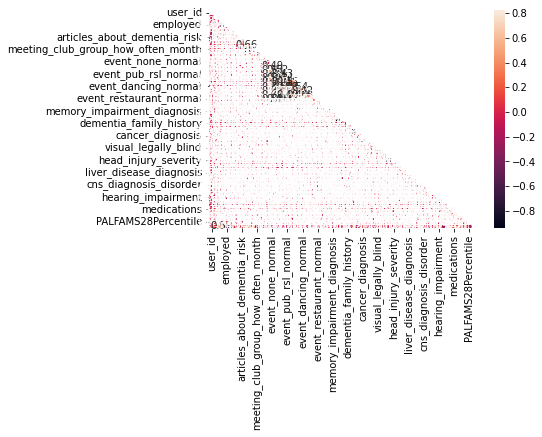

In [25]:
# correlation heatmap for all features
corr = dfx.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask = mask, annot=True)
plt.show()

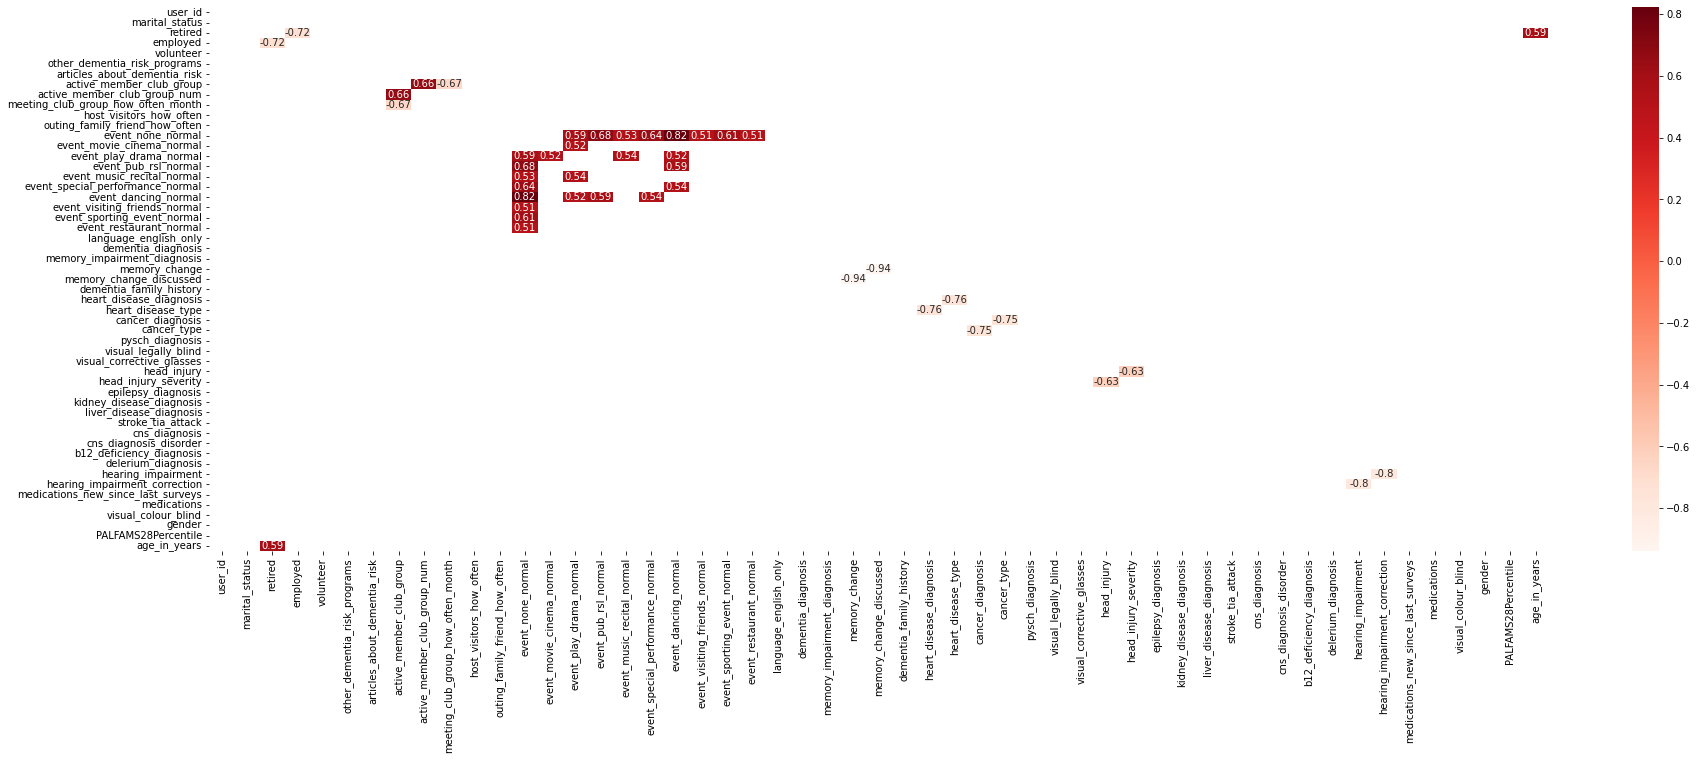

In [26]:
dfCorr = dfx.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

In [35]:
dfCorr["memory_change"] = dfCorr["memory_change"].abs()

In [37]:
dfCorr["memory_change"].sort_values(ascending=False)

memory_change                         1.000000
memory_change_discussed               0.938250
pysch_diagnosis                       0.126775
stroke_tia_attack                     0.119961
medications_new_since_last_surveys    0.082173
head_injury                           0.077874
head_injury_severity                  0.069124
marital_status                        0.064937
hearing_impairment                    0.059413
medications                           0.058576
event_movie_cinema_normal             0.058572
visual_legally_blind                  0.054891
hearing_impairment_correction         0.051930
kidney_disease_diagnosis              0.047481
dementia_family_history               0.047448
host_visitors_how_often               0.044871
heart_disease_diagnosis               0.044517
event_restaurant_normal               0.041474
dementia_diagnosis                    0.041434
visual_corrective_glasses             0.038555
event_visiting_friends_normal         0.038075
gender       

In [38]:
# mapping features to their absolute correlation values
corr = dfx.corr().abs()

# setting equality (self correlation) as zero
corr[corr == 1] = 0

# of each feature, finding the max correlation
# and sorting the resulting array in descending order
corr_cols = corr.max().sort_values(ascending=False)

# displaying the highly correlated features where coo_value>0.7
display(corr_cols[corr_cols > 0.7])

memory_change_discussed          0.938250
memory_change                    0.938250
event_dancing_normal             0.821594
event_none_normal                0.821594
hearing_impairment_correction    0.800705
hearing_impairment               0.800705
heart_disease_diagnosis          0.756184
heart_disease_type               0.756184
cancer_type                      0.747711
cancer_diagnosis                 0.747711
employed                         0.718254
retired                          0.718254
dtype: float64

In [39]:
#Dropping highly correlated columns
# dfx= dfx.drop(['memory_change_discussed','event_none_normal','hearing_impairment_correction','heart_disease_diagnosis','cancer_diagnosis','employed'], axis=1)

In [40]:
dfx.head()

,user_id,marital_status,retired,employed,volunteer,other_dementia_risk_programs,articles_about_dementia_risk,active_member_club_group,active_member_club_group_num,meeting_club_group_how_often_month,...,b12_deficiency_diagnosis,delerium_diagnosis,hearing_impairment,hearing_impairment_correction,medications_new_since_last_surveys,medications,visual_colour_blind,gender,PALFAMS28Percentile,age_in_years
0,519753,5,1,0,1,0,1,1,2.0,3,...,0,0,0,2,1,1,0,0,53.0,75
1,570985,1,1,0,0,0,1,0,0.0,6,...,0,0,1,1,0,1,0,1,50.0,69
2,517843,1,1,0,1,1,0,1,4.0,1,...,0,0,0,2,0,1,0,0,46.0,71
3,517890,0,1,0,0,0,0,0,0.0,6,...,0,0,0,2,0,1,0,1,72.0,61
4,565272,1,1,0,1,0,1,1,1.0,3,...,0,0,0,2,0,1,1,1,26.0,65


In [41]:
x = dfx[dfx.columns[dfx.columns != 'memory_change']]
x = x[x.columns[x.columns != "PALFAMS28Percentile"]]
y = dfx.memory_change
 
# Statsmodels.OLS requires us to add a constant.
x = sm.add_constant(x)
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          memory_change   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     274.6
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        19:14:59   Log-Likelihood:                 1250.0
No. Observations:                1810   AIC:                            -2396.
Df Residuals:                    1758   BIC:                            -2110.
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

**p-value** stands for ‘probability value’; it tells how likely it is that a result occurred by chance alone. Basically, the p-value is used in hypothesis testing to help you support or reject the null hypothesis. The smaller the p-value, the stronger the evidence to reject the null hypothesis.<br><br>


In [42]:
pval = pd.DataFrame({'pvalue': round(results.pvalues,3)})
mem_val = corr["memory_change"]
pval_dict = pval.to_dict()
mem_val_dict = mem_val.to_dict()
del(pval_dict["pvalue"]["const"])
del(pval_dict["pvalue"]["user_id"])

In [43]:
data_list = []
index_names = []
for each_key in pval_dict["pvalue"]:
  index_names.append(each_key)
  nx = []
  if each_key in mem_val_dict:
    nx.append(mem_val_dict[each_key])
  else:
    nx.append(np.nan)
  nx.append(pval_dict["pvalue"][each_key])
  data_list.append(nx)
display_df = pd.DataFrame(data_list, columns=["corr_value", "p_value"], index=index_names)


In [44]:
#column based targetvariable class distribution
targetdf = dfx.groupby('memory_change').apply(np.mean).head()
targetdf.style.background_gradient(cmap='Reds')

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,user_id,marital_status,retired,employed,volunteer,other_dementia_risk_programs,articles_about_dementia_risk,active_member_club_group,active_member_club_group_num,meeting_club_group_how_often_month,host_visitors_how_often,outing_family_friend_how_often,event_none_normal,event_movie_cinema_normal,event_play_drama_normal,event_pub_rsl_normal,event_music_recital_normal,event_special_performance_normal,event_dancing_normal,event_visiting_friends_normal,event_sporting_event_normal,event_restaurant_normal,language_english_only,dementia_diagnosis,memory_impairment_diagnosis,memory_change,memory_change_discussed,dementia_family_history,heart_disease_diagnosis,heart_disease_type,cancer_diagnosis,cancer_type,pysch_diagnosis,visual_legally_blind,visual_corrective_glasses,head_injury,head_injury_severity,epilepsy_diagnosis,kidney_disease_diagnosis,liver_disease_diagnosis,stroke_tia_attack,cns_diagnosis,cns_diagnosis_disorder,b12_deficiency_diagnosis,delerium_diagnosis,hearing_impairment,hearing_impairment_correction,medications_new_since_last_surveys,medications,visual_colour_blind,gender,PALFAMS28Percentile,age_in_years
memory_change,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,471938.571054,1.890635,0.573674,0.429601,0.449247,0.123117,0.689587,0.656843,1.592010,4.524558,3.151932,3.638507,0.037983,0.661428,0.358874,0.256713,0.472823,0.299280,0.143418,0.853307,0.339227,0.860511,0.949574,0.006549,0.020301,0.000000,2.000000,0.459725,0.083170,113.520629,0.154551,137.339227,0.153242,0.017682,0.870989,0.058284,85.209561,0.020956,0.039948,0.034054,0.045842,0.030779,15.886706,0.053045,0.020956,0.178782,1.779961,0.181401,0.635232,0.051735,0.271775,51.473968,65.158481
1,471101.363958,2.222615,0.590106,0.385159,0.459364,0.144876,0.727915,0.646643,1.501767,4.611307,2.975265,3.611307,0.038869,0.572438,0.395760,0.215548,0.448763,0.272085,0.166078,0.805654,0.307420,0.809187,0.964664,0.021201,0.031802,1.000000,0.434629,0.526502,0.120141,111.777385,0.176678,137.402827,0.289753,0.049470,0.908127,0.120141,83.134276,0.035336,0.074205,0.035336,0.141343,0.049470,15.826855,0.067138,0.017668,0.247350,1.699647,0.272085,0.717314,0.060071,0.318021,49.101010,65.272085


In [45]:
display_df = deepcopy(display_df.sort_values("corr_value", ascending=False))

# Now joining the auth_user data and the cantab data

In [46]:
auth_data = pd.read_csv(auth_file_name, skiprows=range(1, 24))
# skipping first 23 rows of data, as told by Eddy Roccati(eddy.roccati@utas.edu.au) because they aren't actual users!
# dfx -> actual cleaned data
# auth_data -> auth_user for matching

In [47]:
meaningful_cols = set(['id', 'mm2_user_id'])
cols_to_delete = set(list(auth_data.columns)).difference(meaningful_cols)
print("Dropping columns - {0}".format(", ".join(cols_to_delete)))
auth_data.drop(cols_to_delete, axis=1, inplace=True)

Dropping columns - last_name, password, username, date_joined, last_login, is_staff, is_superuser, email, first_name, is_active


In [48]:
auth_data.shape

(2153, 2)

In [49]:
auth_data.head()

,id,mm2_user_id
0,1041,571304.0
1,1042,586122.0
2,1043,109302.0
3,1044,572898.0
4,1045,516841.0


In [50]:
auth_data.dtypes

id               int64
mm2_user_id    float64
dtype: object

In [51]:
auth_data = auth_data.dropna()

In [52]:
auth_data.head(5)

,id,mm2_user_id
0,1041,571304.0
1,1042,586122.0
2,1043,109302.0
3,1044,572898.0
4,1045,516841.0


In [53]:
original_shape = dfx.shape

In [54]:
auth_data["mm2_user_id"] = auth_data["mm2_user_id"].astype(int)
dfx["user_id"] = dfx["user_id"].astype(int)

In [55]:
def get_mapping(user_id):
    try:
        return auth_data[auth_data["mm2_user_id"]==user_id]["id"].iloc[0]
    except:
        print("No data for {0}".format(user_id))
        return None

In [56]:
dfx.insert (1, "Symbol", None)
dfx['mapped_user_id'] = dfx.apply(lambda row: get_mapping(row.user_id), axis=1)

In [57]:
not_null_shape = dfx[dfx["mapped_user_id"].notnull()].shape

In [58]:
final_shape = dfx.shape

In [59]:
print("Original Shape: {0}\n\nAfter Merging:\nNot Null Shape: {1}\nFinal Shape: {2}".format(original_shape, not_null_shape, final_shape))

Original Shape: (1810, 53)

After Merging:
Not Null Shape: (1810, 54)
Final Shape: (1810, 54)


In [60]:
# Now, the column user_id is no use to us. We can drop it
dfx.drop("user_id", axis=1, inplace=True)

In [61]:
dfx.head()

,mapped_user_id,marital_status,retired,employed,volunteer,other_dementia_risk_programs,articles_about_dementia_risk,active_member_club_group,active_member_club_group_num,meeting_club_group_how_often_month,...,b12_deficiency_diagnosis,delerium_diagnosis,hearing_impairment,hearing_impairment_correction,medications_new_since_last_surveys,medications,visual_colour_blind,gender,PALFAMS28Percentile,age_in_years
0,2188,5,1,0,1,0,1,1,2.0,3,...,0,0,0,2,1,1,0,0,53.0,75
1,1338,1,1,0,0,0,1,0,0.0,6,...,0,0,1,1,0,1,0,1,50.0,69
2,1538,1,1,0,1,1,0,1,4.0,1,...,0,0,0,2,0,1,0,0,46.0,71
3,1717,0,1,0,0,0,0,0,0.0,6,...,0,0,0,2,0,1,0,1,72.0,61
4,2035,1,1,0,1,0,1,1,1.0,3,...,0,0,0,2,0,1,1,1,26.0,65


In [62]:
with pd.ExcelWriter(output_file) as writer:
    dfx.to_excel(writer, sheet_name=output_data_sheet, index=False, header=True)
    display_df.to_excel(writer, sheet_name=output_corr_sheet, index=True, header=True)